# **Análise dos medalhistas das Olimpíadas**
Primeiro mini projeto para os trainees do Turing Academy, o programa de capacitação dos novos membros do Turing USP.

A ideia é exercitar os conceitos aprendidos nas primeiras semanas, que envolvem limpeza e plotagem de dados! Dessa vez, a base escolhida pra análise foi a de atletas que já participaram das Olimpiadas, com a intenção de que tirássemos alguns insights sobre possíveis padrões entre os medalhistas.



## **Inicializando e fazendo a limpeza dos dados**

In [548]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [549]:
data = pd.read_excel('/content/df_athlete_events.xlsx')
data.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


Usando o método .info() já é possível ter uma noção dos nossos tipos de dados, e também sobre onde começar a procurar problemas (como em Weight, em que era esperado que fosse um dado numérico)

In [550]:
data.set_index('Athlete_ID',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45567 entries, 4 to 135563
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    45567 non-null  object 
 1   Sex     45567 non-null  object 
 2   Age     44594 non-null  float64
 3   Height  35547 non-null  float64
 4   Weight  34926 non-null  object 
 5   Team    45567 non-null  object 
 6   NOC     45567 non-null  object 
 7   Games   45567 non-null  object 
 8   Year    45567 non-null  int64  
 9   Season  45567 non-null  object 
 10  City    45567 non-null  object 
 11  Sport   45567 non-null  object 
 12  Event   45567 non-null  object 
 13  Medal   39804 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.2+ MB


### **Dados Categóricos**

Começando então pelos dados categóricos, podemos usar o método .describe() pra ter uma noção de como eles são.

In [551]:
data.describe(include='object')


,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,34926,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,1443,5515,5957,2321,38607,4091,4811,1379,13320


####**Weight**

Começando pela coluna que já sabemos ter algum problema, encontramos uma risadinha 'hsuahusahu', que deve ser o que fez com que a biblioteca enterpretasse a coluna como texto.

In [552]:
print(data.Weight.unique())

[nan '75.0' '85.0' '64.0' '72.0' '90.0' '87.0' '49.0' 'hsuahusahu' '76.0'
 '83.0' '86.0' '82.0' '55.0' '67.0' '60.0' '79.0' '96.0' '97.0' '70.0'
 '88.0' '56.0' '80.0' '59.0' '91.0' '62.0' '63.0' '130.0' '104.0' '73.0'
 '84.0' '125.0' '50.0' '102.0' '48.0' '58.0' '78.0' '40.0' '68.0' '92.0'
 '61.0' '95.0' '89.0' '65.0' '93.0' '77.0' '46.0' '81.0' '52.0' '54.0'
 '57.0' '69.0' '99.0' '69.5' '51.0' '120.0' '74.0' '110.0' '100.0' '66.0'
 '47.0' '116.0' '107.0' '53.0' '45.0' '105.0' '109.0' '156.0' '71.0'
 '98.0' '160.0' '106.0' '146.0' '44.0' '138.0' '141.0' '94.0' '118.0'
 '101.0' '39.0' '32.0' '112.0' '115.0' '74.5' '121.0' '135.0' '111.0'
 '43.0' '36.0' '67.5' '114.0' '132.0' '65.5' '42.0' '59.5' '127.5' '108.0'
 '35.0' '117.0' '103.0' '58.5' '214.0' '113.0' '146.5' '116.5' '140.0'
 '38.0' '101.5' '154.0' '57.5' '136.0' '127.0' '102.5' '170.0' '126.0'
 773333333333333 '122.0' '55.5' '41.0' '123.0' '34.0' '150.0' '109.5'
 '37.0' '70.5' '71.5' '30.0' '76.5' '64.5' '33.0' '129.0' '137.0' '1

Aqui, transformo as risadinhas em NaN, assim dá pra passar a coluna pra numéricos e tratar melhor esses valores vazios depois.

In [553]:
data.Weight.replace('hsuahusahu', np.nan, inplace=True)
data['Weight'] = pd.to_numeric(data['Weight'])

####**Sex**

A coluna de gênero tem mais do que os dois valores padrão, sendo que alguns deles são sinônimos, então podemos substituí-los. Daí, achei melhor só excluir os que estão faltando porque são poucos e não faz sentido trocar pela moda dos valores ou algo do tipo.

In [554]:
print(data.Sex.unique())

['M' 'MALE' 'FEMALE' 'F' 'Vic vai te dar um socao' 'P&D >> Comunidade']


In [555]:
data.Sex.replace(['MALE','FEMALE'],['M','F'], inplace=True)

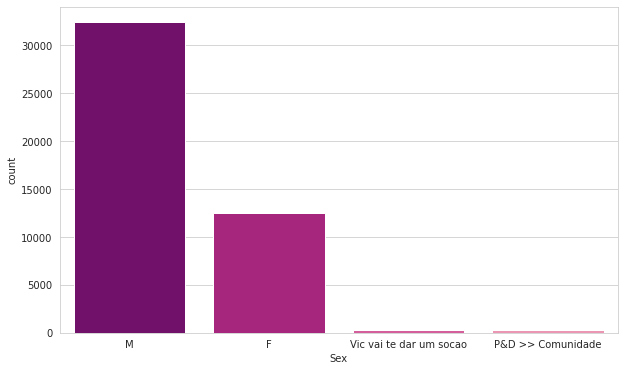

In [556]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',data=data)

In [557]:
data.drop(data[~data['Sex'].isin(['M','F'])].index,inplace=True)

####**Season**

Aqui eu poderia fazer como em Sex e retirar as linhas com valores estranhos, mas, dando uma olhada na coluna Games, é possível ver que ela está completa e sem erros, então posso aproveitar pra ajustar as estações.

In [558]:
print(data.Season.unique())

['Summer' 'Winter' '#ForaBolsonaro' 'Ele n��o' 'Ele nunca']


In [559]:
print(data.Games.unique(),'\n')
print('Valores nulos na coluna Games: \n', data.Season.isna().value_counts())

['1900 Summer' '1992 Winter' '1920 Summer' '2014 Winter' '1948 Summer'
 '1952 Summer' '1994 Winter' '2002 Winter' '2006 Winter' '2008 Summer'
 '1988 Summer' '1996 Summer' '1952 Winter' '1960 Winter' '1912 Summer'
 '1956 Summer' '2016 Summer' '2000 Summer' '2012 Summer' '2004 Summer'
 '1980 Summer' '1984 Summer' '1992 Summer' '1936 Summer' '1906 Summer'
 '1964 Summer' '1960 Summer' '1972 Summer' '1924 Summer' '1924 Winter'
 '1904 Summer' '1932 Summer' '1928 Winter' '1988 Winter' '1968 Winter'
 '1976 Summer' '1998 Winter' '2010 Winter' '1908 Summer' '1928 Summer'
 '1968 Summer' '1972 Winter' '1980 Winter' '1984 Winter' '1936 Winter'
 '1956 Winter' '1976 Winter' '1964 Winter' '1948 Winter' '1932 Winter'
 '1896 Summer'] 

Valores nulos na coluna Games: 
 False    44279
Name: Season, dtype: int64


In [560]:
data.Season = [i[-6:] for i in data['Games']]

In [561]:
print(data.Season.unique())

#só pra dar uma última checada

['Summer' 'Winter']


####**Medal**

Além dos valores esperados pra medalhas, também aparece a string 'Nelson' (KKKKKKKKK). Como são poucas as ocorrências, acredito que seja ok assumir esses valores como não-medalhistas (atribuir aleatoriamente as medalhas não faz muito sentido)

In [562]:
data.Medal.unique()

array(['Gold', nan, 'Bronze', 'Silver', 'Nelson'], dtype=object)

In [563]:
data.Medal.isnull().value_counts()

False    38624
True      5655
Name: Medal, dtype: int64

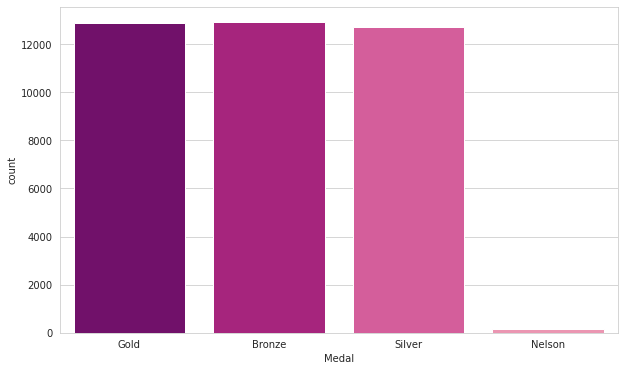

In [564]:
plt.figure(figsize=(10,6))
sns.countplot(x='Medal',data=data)

In [565]:
data.Medal.replace('Nelson',np.nan, inplace=True)


####**City**

Olhando as colunas que parecem estar ok só por desencargo de consciência

In [566]:
print(data.City.unique())

['Paris' 'Albertville' 'Antwerpen' 'Sochi' 'London' 'Helsinki'
 'Lillehammer' 'Salt Lake City' 'Torino' 'Beijing' 'Seoul' 'Atlanta'
 'Oslo' 'Squaw Valley' 'Stockholm' 'Melbourne' 'Rio de Janeiro' 'Sydney'
 'Athina' 'Moskva' 'Los Angeles' 'Barcelona' 'Berlin' 'Tokyo' 'Roma'
 'Munich' 'Chamonix' 'St. Louis' 'Sankt Moritz' 'Calgary' 'Grenoble'
 'Montreal' 'Nagano' 'Vancouver' 'Amsterdam' 'Mexico City' 'Sapporo'
 'Lake Placid' 'Sarajevo' 'Garmisch-Partenkirchen' "Cortina d'Ampezzo"
 'Innsbruck' '######']


Encontrei o '######', que olhando por cima, não parece representar nenhuma cidade nem ser de alguma edição especificas. Seria possível encontrar as cidades correspondentes por ano, mas como são poucos valores, acho que tudo bem dropar.

In [567]:
data[data['City']=='######'].head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
5815,"Gillian ""Jill"" Atkins",F,29.0,165.0,65.0,Great Britain,GBR,1992 Summer,1992,Summer,######,Hockey,Hockey Women's Hockey,Bronze
7903,Jane Louise Barkman (-Brown),F,17.0,169.0,61.0,United States,USA,1968 Summer,1968,Summer,######,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold
10360,Liubov Ivanivna Berezhna-Odynokova,F,20.0,167.0,61.0,Soviet Union,URS,1976 Summer,1976,Summer,######,Handball,Handball Women's Handball,Gold
10955,Annemieke Marileen Bes,F,30.0,177.0,70.0,Netherlands,NED,2008 Summer,2008,Summer,######,Sailing,Sailing Women's Three Person Keelboat,Silver
11671,"Suzanne Brigit ""Sue"" Bird",F,35.0,175.0,66.0,United States,USA,2016 Summer,2016,Summer,######,Basketball,Basketball Women's Basketball,Gold


In [568]:
len(data['City'][data['City']=='######'])

128

In [569]:
data.drop(data[data['City']=='######'].index, inplace=True)

####**Sport**

Nenhum nome estranho entre os esportes

In [570]:
print(data.Sport.unique())

['Tug-Of-War' 'Cross Country Skiing' 'Swimming' 'Ice Hockey' 'Gymnastics'
 'Alpine Skiing' 'Handball' 'Hockey' 'Football' 'Speed Skating' 'Sailing'
 'Cycling' 'Rowing' 'Fencing' 'Taekwondo' 'Athletics' 'Canoeing'
 'Water Polo' 'Wrestling' 'Modern Pentathlon' 'Figure Skating' 'Golf'
 'Softball' 'Volleyball' 'Boxing' 'Basketball' 'Nordic Combined'
 'Baseball' 'Diving' 'Shooting' 'Freestyle Skiing' 'Bobsleigh'
 'Equestrianism' 'Curling' 'Judo' 'Tennis' 'Badminton' 'Rugby Sevens'
 'Rhythmic Gymnastics' 'Weightlifting' 'Beach Volleyball' 'Rugby'
 'Ski Jumping' 'Short Track Speed Skating' 'Archery' 'Lacrosse'
 'Synchronized Swimming' 'Biathlon' 'Triathlon' 'Polo' 'Luge'
 'Table Tennis' 'Art Competitions' 'Snowboarding' 'Cricket' 'Skeleton'
 'Racquets' 'Military Ski Patrol' 'Croquet' 'Roque' 'Alpinism'
 'Trampolining' 'Basque Pelota' 'Motorboating' 'Jeu De Paume'
 'Aeronautics']


####**NOC**

Todas as siglas têm 3 letras, então parece estar certo

In [571]:
data['NOC'].str.len().value_counts()

3    44007
Name: NOC, dtype: int64

## **Dados Numericos**


Partindo agora pros dados numéricos, temos 4 colunas já que ajustamos a coluna de Peso

In [572]:
data.describe(include='number')

,Age,Height,Weight,Year
count,43041.000000,3.417400e+04,3.311700e+04,44007.000000
mean,25.869915,9.500833e+02,2.335155e+10,1972.014543
std,5.974603,3.365256e+04,4.249533e+12,94.785715
min,10.000000,1.320000e+02,2.800000e+01,-2992.000000
25%,22.000000,1.700000e+02,6.300000e+01,1952.000000
50%,25.000000,1.780000e+02,7.300000e+01,1984.000000
75%,29.000000,1.850000e+02,8.300000e+01,2002.000000
max,73.000000,1.976779e+06,7.733333e+14,2016.000000


####**Weight**

Olhando pelos percentis descritos, a maioria dos dados está na mesma casa decimal, exceto pelo máximo. Daí, podemos tirá-lo

In [573]:
data.Weight.replace(773333333333333,np.nan, inplace=True)

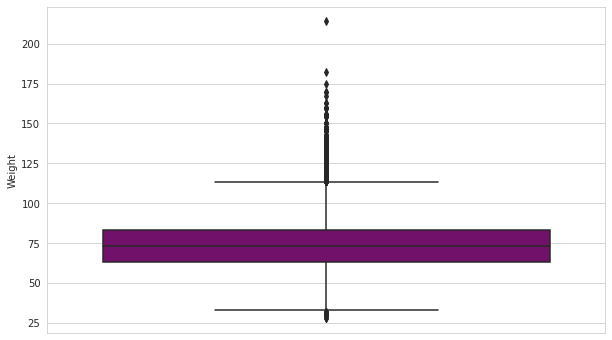

In [574]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Weight', data=data)

In [575]:
data[data['Weight']==data.Weight.max()]

#checando quem é o 'outlier' que sobrou, tá tudo certo já que ele é um lutador de judo da categoria de peso Pesado

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN


Depois, como são muito valores vazios, achei que seria de bom tom substituí-los por valores distribuidos normalmente (com média e variância iguais à da distribuição do peso)

In [576]:
data.Weight.isna().value_counts()

False    33116
True     10891
Name: Weight, dtype: int64

<Figure size 720x432 with 0 Axes>

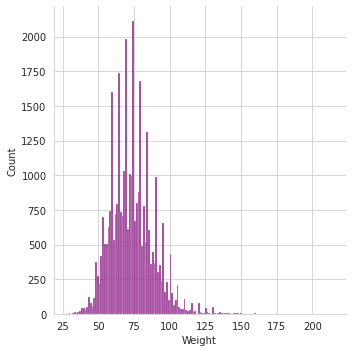

In [577]:
plt.figure(figsize=(10,6))
sns.displot(data.Weight)

In [578]:
data.loc[data['Weight'].isna()==True, 'Weight'] = np.random.normal(loc = data['Weight'].mean(), scale=data['Weight'].std(), size=len(data.loc[data['Weight'].isna()==True, 'Weight']))

<Figure size 720x432 with 0 Axes>

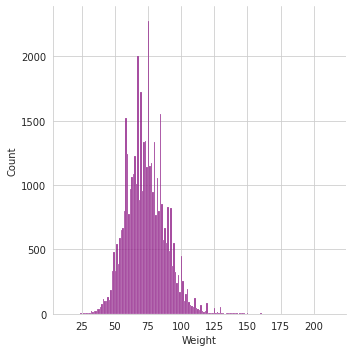

In [579]:
plt.figure(figsize=(10,6))
sns.displot(data.Weight)

In [580]:
data.Weight.isna().value_counts()

False    44007
Name: Weight, dtype: int64

####**Height**

Pelo boxplot, dá pra ver que temos números muito exagerados. Supondo 300 um peso razoável, são poucos os que estão acima disso, então tudo bem retirá-los

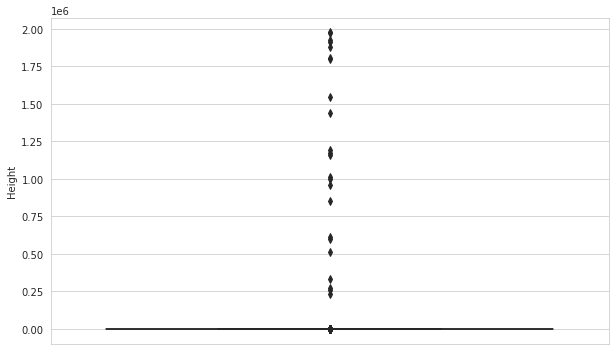

In [581]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Height', data=data)

In [582]:
len(data[data['Height']>300])

23

In [583]:
data.drop(data[data['Height']>300].index, inplace=True)

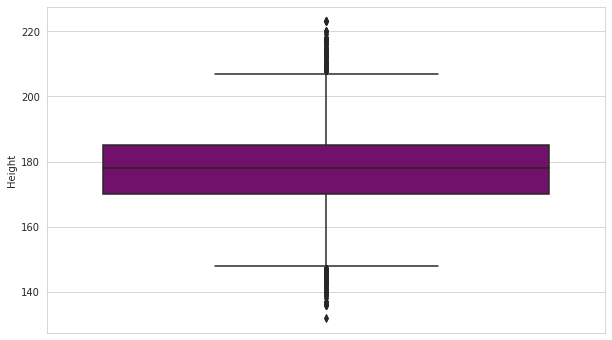

In [584]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Height', data=data)

Trato os NaN da mesma forma que em Weight

In [585]:
data.Height.isna().value_counts()

False    34135
True      9833
Name: Height, dtype: int64

<Figure size 720x432 with 0 Axes>

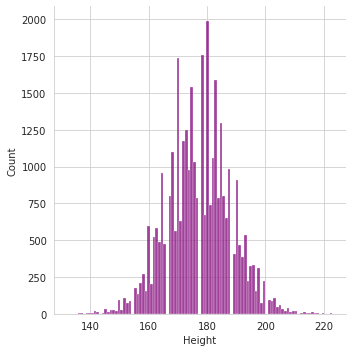

In [586]:
plt.figure(figsize=(10,6))
sns.displot(data.Height)

In [587]:
data.loc[data['Height'].isna()==True, 'Height'] = np.random.normal(loc = data['Height'].mean(), scale=data['Height'].std(), size=len(data.loc[data['Height'].isna()==True, 'Height']))

<Figure size 720x432 with 0 Axes>

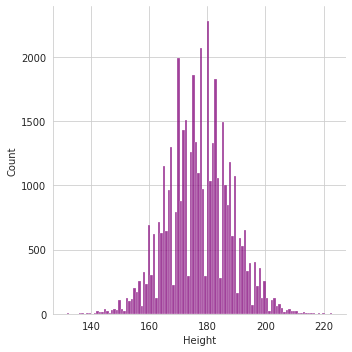

In [588]:
plt.figure(figsize=(10,6))
sns.displot(data.Height)

####**Age**

São poucos os valores NaN, e como agora só a idade tá faltando, decidi deixar assim mesmo. 

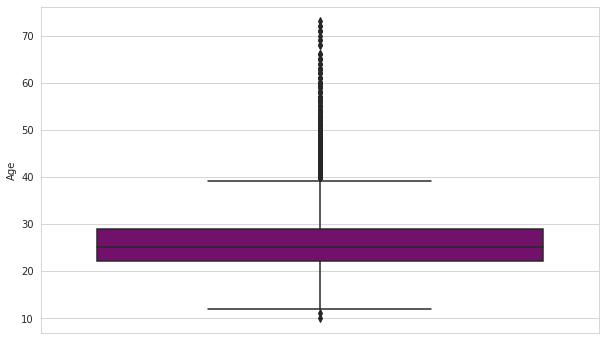

In [589]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Age', data=data)

In [590]:
data.Age.isna().value_counts()

False    43002
True       966
Name: Age, dtype: int64

In [591]:
data[data.Age.isna()].head(10)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
139,"George ""Ioannis"" Abbot",M,NaN,193.457160,85.750271,Thessalonki-1,GRE,1906 Summer,1906,Summer,Athina,Football,Football Men's Football,Bronze
230,Moustafa Abdelal,M,NaN,177.823498,75.424203,Egypt,EGY,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
884,Eugene Addor,M,NaN,179.124936,78.188672,Switzerland,SUI,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Rifle, 300 metres and ...",Bronze
1197,Seyyit Ahmet Aral,M,NaN,168.000000,70.000000,Turkey,TUR,1968 Summer,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN
1208,Ioannis Agrimis,M,NaN,164.725133,86.001636,"Large boat, Central Naval Prep School ""Poros""-1",GRE,1906 Summer,1906,Summer,Athina,Rowing,Rowing Men's 17-Man Naval Rowing Boats,Gold
1595,Hseyin Akba,M,NaN,167.000000,57.000000,Turkey,TUR,1956 Summer,1956,Summer,Melbourne,Wrestling,"Wrestling Men's Flyweight, Freestyle",Bronze
1595,Hseyin Akba,M,NaN,167.000000,57.000000,Turkey,TUR,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Silver
1679,Erdoan Akn,M,NaN,179.895119,84.893251,Turkey,TUR,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN
1977,Rashid Ismail Al-Jirbi,M,NaN,171.000000,61.000000,United Arab Emirates,UAE,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's 400 metres,NaN


Quanto aos valores mais extremos, checando o perfil dos atletas, tá tudo certinho.

In [592]:
data[(data.Age==73) |( data.Age==10)]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
22984,John (Herbert Crawford-) Copley (Williamson-),M,73.0,181.653950,58.139435,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver
71691,Dimitrios Loundras,M,10.0,175.461692,58.397956,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


####**Year**

Temos valores impossíveis aqui, com até mesmo anos negativos. Pra corrigir, faço da mesma forma que foi feito pra coluna Season, pegando os primeiros 4 caracteres da coluna Games pra encontrar o ano de todos os jogos.

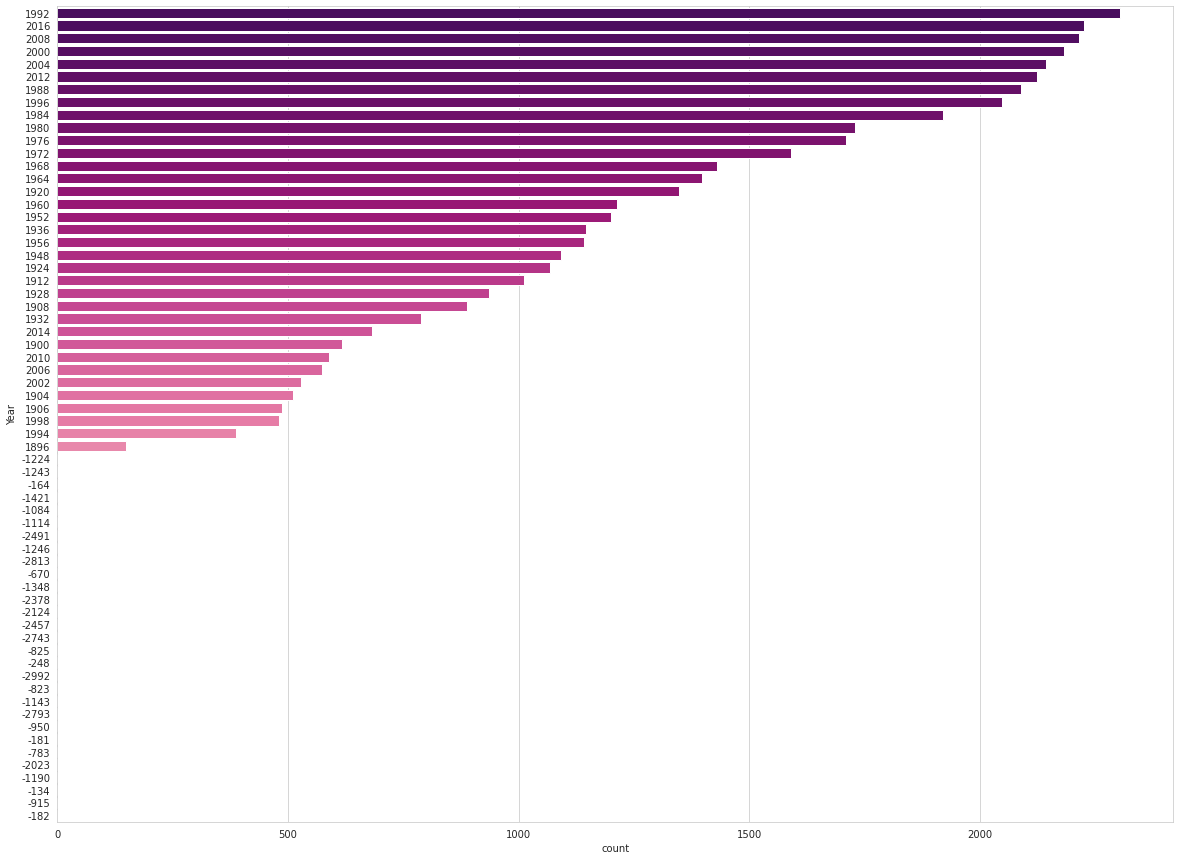

In [593]:
plt.figure(figsize=(20,15))
sns.countplot(y='Year', data = data, order = data.Year.value_counts().index, palette='RdPu_r')

In [594]:
data['Year'] = [int(i[:4]) for i in data['Games']]

## **Agora analisando os medalhistassss**


De início, o que eu consigo pensar aqui é em entender tanto o perfil dos geral medalhistas quanto como eles se dividem dentro dos esportes e países. 

As principais informações que podemos tirar dos atletas são:

*   Idade 
*   Altura
*   Peso
*   Delegação
*   Gênero

Pra entendermos como eles estão distribuidos dentre esses dados, vamos plotar alguns gráficos. Pra isso, precisamos agrupar as informações em números primeiro. 

In [596]:
#contagem de atletas por delegação

athletes_count = data.groupby('NOC').count().sort_values('Name', ascending=False).reset_index()

top_athletes_count = athletes_count[:10]

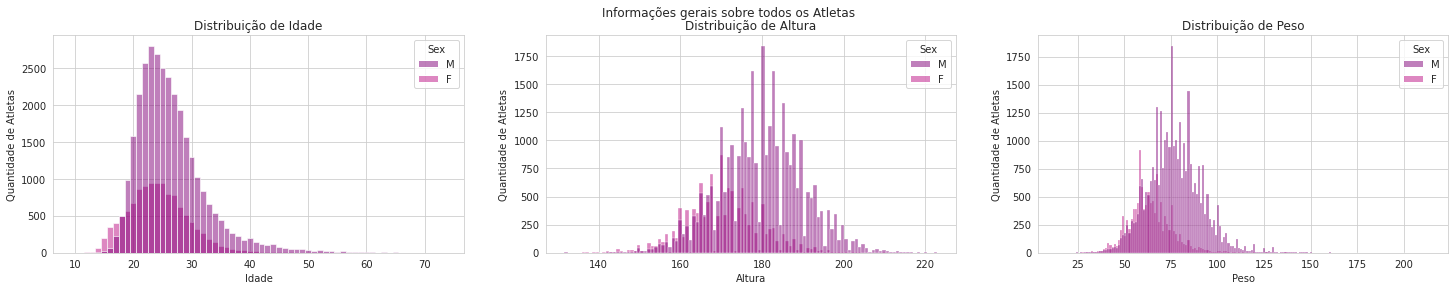

In [597]:
fig, axs = plt.subplots(1,3, figsize=(25,4))
fig.suptitle('Informações gerais sobre todos os Atletas')
sns.set_style("whitegrid")
sns.set_palette('RdPu_r')

sns.histplot(data.reset_index(), x='Age', hue='Sex', ax=axs[0],discrete=True)
axs[0].set(xlabel='Idade', ylabel='Quantidade de Atletas')
axs[0].set_title('Distribuição de Idade')

sns.histplot(data.reset_index(), x='Height', hue='Sex', ax=axs[1])
axs[1].set(xlabel='Altura', ylabel='Quantidade de Atletas')
axs[1].set_title('Distribuição de Altura')

sns.histplot(data.reset_index(), x='Weight', hue='Sex', ax=axs[2])
axs[2].set(xlabel='Peso', ylabel='Quantidade de Atletas')
a=axs[2].set_title('Distribuição de Peso')



Os atletas que já participaram das olimpíadas tinham em média de 23 a 25 anos, altura média entre 1,70m e 1,75m para as mulheres e 1,75m a 1,85m para os homens. Quanto ao peso, ele ficava próximo de 60-70kg para elas e 70-80kg pra eles.

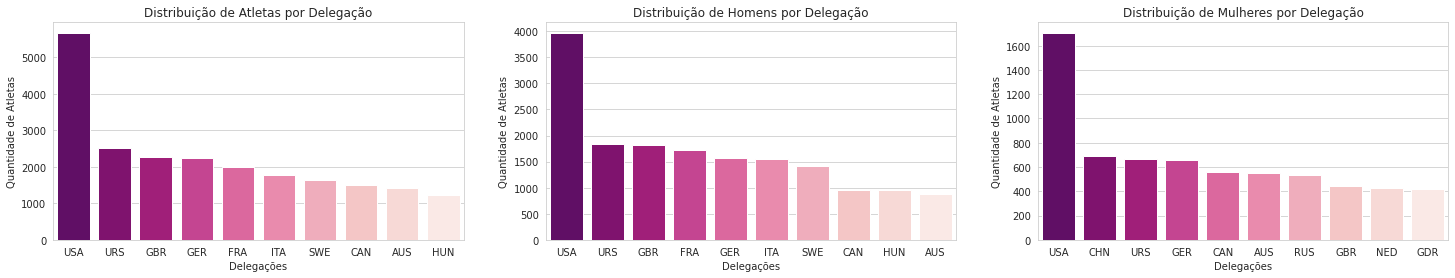

In [598]:
#gráficos sobre as delegações
fig, axs = plt.subplots(1,3, figsize=(25,4))

sns.barplot(data=top_athletes_count, x='NOC', y='Name', ax=axs[0],palette='RdPu_r')
axs[0].set(xlabel='Delegações', ylabel='Quantidade de Atletas')
axs[0].set_title('Distribuição de Atletas por Delegação')

sns.barplot(data=data[data.Sex=='M'].groupby('NOC').count().sort_values('Name', ascending=False).reset_index()[:10],x='NOC', y='Name', ax=axs[1],palette='RdPu_r')
axs[1].set(xlabel='Delegações', ylabel='Quantidade de Atletas')
axs[1].set_title('Distribuição de Homens por Delegação')

sns.barplot(data=data[data.Sex=='F'].groupby('NOC').count().sort_values('Name', ascending=False).reset_index()[:10],x='NOC', y='Name', ax=axs[2],palette='RdPu_r')
axs[2].set(xlabel='Delegações', ylabel='Quantidade de Atletas')
a = axs[2].set_title('Distribuição de Mulheres por Delegação')

Quanto a origem dos atletas, a maioria vem dos USA, da antiga URSS e do Reino Unido. Isso muda um pouco quando olhamos pras atletas femininas, com a China na frente a União Soviética.

Agora, vale a pena entender se os medalhistas se destacam de alguma forma dentro desses padrões gerais.

In [599]:
#agrupando medalhista

winners = data[~data['Medal'].isna()]

#contagem atletas medalhistas por delegação

winner_athletes_count = winners.groupby('NOC').count().sort_values('Name', ascending=False).reset_index()

top_winner_athletes_count = winner_athletes_count[:10]

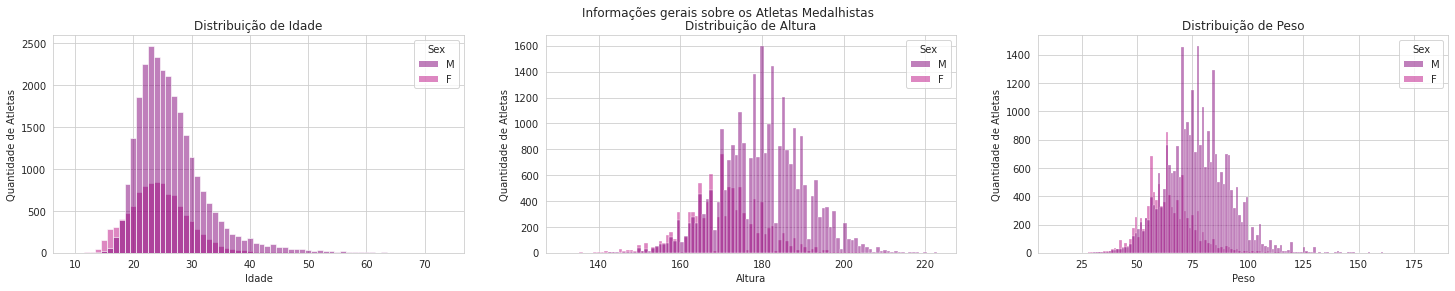

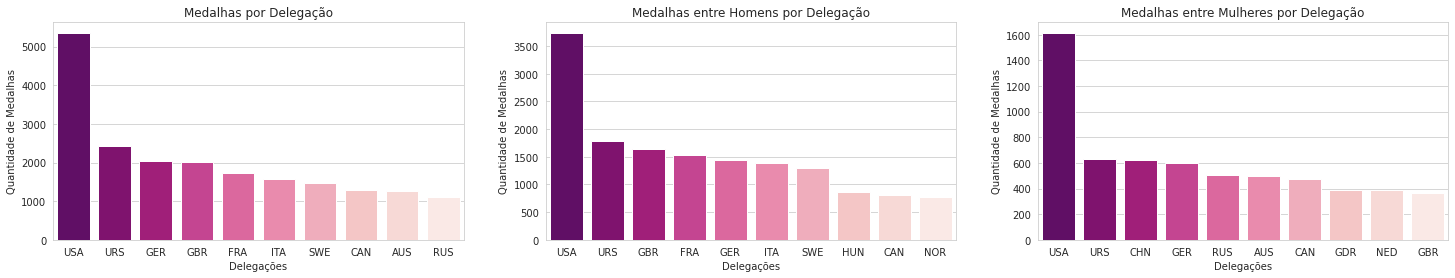

In [600]:
#gráficos sobre as informações gerais
fig, axs = plt.subplots(1,3, figsize=(25,4))
fig.suptitle('Informações gerais sobre os Atletas Medalhistas')

sns.histplot(winners.reset_index(), x='Age', hue='Sex', ax=axs[0],discrete=True)
axs[0].set(xlabel='Idade', ylabel='Quantidade de Atletas')
axs[0].set_title('Distribuição de Idade')

sns.histplot(winners.reset_index(), x='Height', hue='Sex', ax=axs[1])
axs[1].set(xlabel='Altura', ylabel='Quantidade de Atletas')
axs[1].set_title('Distribuição de Altura')

sns.histplot(winners.reset_index(), x='Weight', hue='Sex', ax=axs[2])
axs[2].set(xlabel='Peso', ylabel='Quantidade de Atletas')
a=axs[2].set_title('Distribuição de Peso')

#gráficos sobre as delegações
fig, axs = plt.subplots(1,3, figsize=(25,4))

sns.barplot(data=top_winner_athletes_count, x='NOC', y='Medal', ax=axs[0],palette='RdPu_r')
axs[0].set(xlabel='Delegações', ylabel='Quantidade de Medalhas')
axs[0].set_title('Medalhas por Delegação')

sns.barplot(data=winners[winners.Sex=='M'].groupby('NOC').count().sort_values('Name', ascending=False).reset_index()[:10],x='NOC', y='Medal', ax=axs[1],palette='RdPu_r')
axs[1].set(xlabel='Delegações', ylabel='Quantidade de Medalhas')
axs[1].set_title('Medalhas entre Homens por Delegação')

sns.barplot(data=winners[winners.Sex=='F'].groupby('NOC').count().sort_values('Name', ascending=False).reset_index()[:10],x='NOC', y='Medal', ax=axs[2],palette='RdPu_r')
axs[2].set(xlabel='Delegações', ylabel='Quantidade de Medalhas')
a = axs[2].set_title('Medalhas entre Mulheres por Delegação')

São poucos os atletas da base que não são medalhistas:





In [601]:
print(f'A porcentagem de não-medalhistas é de {round(len(data[data.Medal.isna()==True])/len(data),2)*100}%')

A porcentagem de não-medalhistas é de 13.0%


Portanto, as distribuições das características físicas seguem o mesmo padrão. A maior mudança é na quantidade de medalhas por delegação, onde USA e URS lideram em qualquer perspectiva.

Não vou colocar aqui pra não ser prolixa, mas o mesmo acontece quando olhamos somente os medalhistas de ouro. O que dá a entender que olhar essas características agrupadas não ajuda muito a pensar em perfis de medalhistas. 

É senso comum que jogadores de basquete são altos. Além disso, com meu pouco conhecimento de esportes, sei que países como Japão, Coreia do Sul, China e EUA são bons no Baseball. Então, vamos comparar o perfil desses dois esportes.


In [602]:
base_basket_winners = data[((data['Sport']=='Baseball') | (data['Sport']=='Basketball')) & (~data['Medal'].isna())]

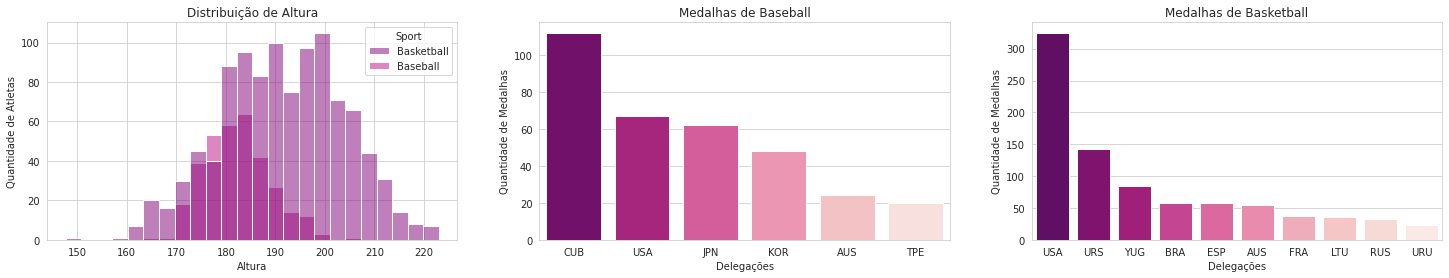

In [603]:
fig, axs = plt.subplots(1,3, figsize=(25,4))


sns.histplot(base_basket_winners.reset_index(), x='Height', hue='Sport', ax=axs[0])
axs[0].set(xlabel='Altura', ylabel='Quantidade de Atletas')
axs[0].set_title('Distribuição de Altura')


sns.barplot(data=base_basket_winners[base_basket_winners.Sport=='Baseball'].groupby('NOC').count().sort_values('Name', ascending=False).reset_index()[:10],x='NOC', y='Medal', ax=axs[1],palette='RdPu_r')
axs[1].set(xlabel='Delegações', ylabel='Quantidade de Medalhas')
axs[1].set_title('Medalhas de Baseball')

sns.barplot(data=base_basket_winners[base_basket_winners.Sport=='Basketball'].groupby('NOC').count().sort_values('Name', ascending=False).reset_index()[:10],x='NOC', y='Medal', ax=axs[2],palette='RdPu_r')
axs[2].set(xlabel='Delegações', ylabel='Quantidade de Medalhas')
a = axs[2].set_title('Medalhas de Basketball')


Fica clara a diferença de altura entre os medalhistas de Baseball e Basketball, como era de se esperar. Outra coisa é que Japão, EUA e Coréia estão entre os medalhistas de Baseball, do jeito que eu imaginei. 

Disso, podemos entender que se quisermos encontrar o perfil dos medalhistas das olimpiadas, é necessário focar em modalidades específicas.

Uma última olhada que eu gostaria de dar é: os atletas russos (ou de países mais frios), vão melhor das Olimpiadas de Inverno?

In [604]:
#Medalhistas do Inverno

winter_winners = data[(data['Season']=="Winter") & (~data['Medal'].isna())]

gold_winter_winners = winter_winners[winter_winners['Medal']=='Gold'].groupby('NOC').count().sort_values('Medal', ascending=False).reset_index()[:10]

silver_winter_winners = winter_winners[winter_winners['Medal']=='Silver'].groupby('NOC').count().sort_values('Medal', ascending=False).reset_index()[:10]

bronze_winter_winners = winter_winners[winter_winners['Medal']=='Bronze'].groupby('NOC').count().sort_values('Medal', ascending=False).reset_index()[:10]


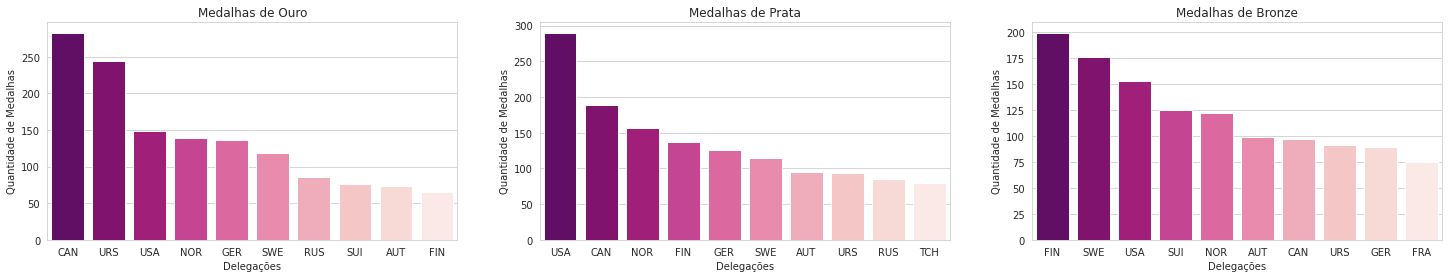

In [605]:
fig, axs = plt.subplots(1,3, figsize=(25,4))

sns.barplot(data=gold_winter_winners, x='NOC', y='Medal', ax=axs[0],palette='RdPu_r')
axs[0].set(xlabel='Delegações', ylabel='Quantidade de Medalhas')
axs[0].set_title('Medalhas de Ouro')

sns.barplot(data=silver_winter_winners, x='NOC', y='Medal', ax=axs[1],palette='RdPu_r')
axs[1].set(xlabel='Delegações', ylabel='Quantidade de Medalhas')
axs[1].set_title('Medalhas de Prata')

sns.barplot(data=bronze_winter_winners, x='NOC', y='Medal', ax=axs[2],palette='RdPu_r')
axs[2].set(xlabel='Delegações', ylabel='Quantidade de Medalhas')
a = axs[2].set_title('Medalhas de Bronze')

E a resposta é sim! Países como Canadá, Noruega, Finlândia, aparecem de forma mais expressiva nas contagens de medalhas do que quando olhamos o quadro geral.



## **Conclusão**

Pra analisar o perfil dos atletas e ter uma noção de quem poderiam ser os próximos medalhistas olimpícos, o melhor caminho é analisar de esporte a esporte, pra assim não perder as particularidades de cada um quando agrupamos todos. Um bom exemplo é o próprio Baseball falado aí em cima: nas olimpiadas de Tokyo, os três medalhistas foram Japão, EUA e a República Dominicana (que não jogava desde 1992), enquanto a Coréia disputou o bronze. 